In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error


from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:


# Load datasets
exercise_df = pd.read_csv("exercise.csv")
calories_df = pd.read_csv("calories.csv")

print(exercise_df.head())
print(calories_df.head())


# Display the first few rows
# print(df.head())

# Check for missing values
# print(df.isnull().sum())


    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


In [ ]:
#  Merge datasets on a common column (assuming "id" exists in both)
df = exercise_df.merge(calories_df, on="User_ID")


In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Check for missing values
print(df.isnull().sum())

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [ ]:
print("this exercise has ",df.shape[0],"rows and ",df.shape[1],"columns")

this exercise has  15000 rows and  9 columns


In [ ]:
print("column :")
for i, columname in enumerate(df.columns):
    print("\t",i+1,columname)

column :
	 1 User_ID
	 2 Gender
	 3 Age
	 4 Height
	 5 Weight
	 6 Duration
	 7 Heart_Rate
	 8 Body_Temp
	 9 Calories


In [ ]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


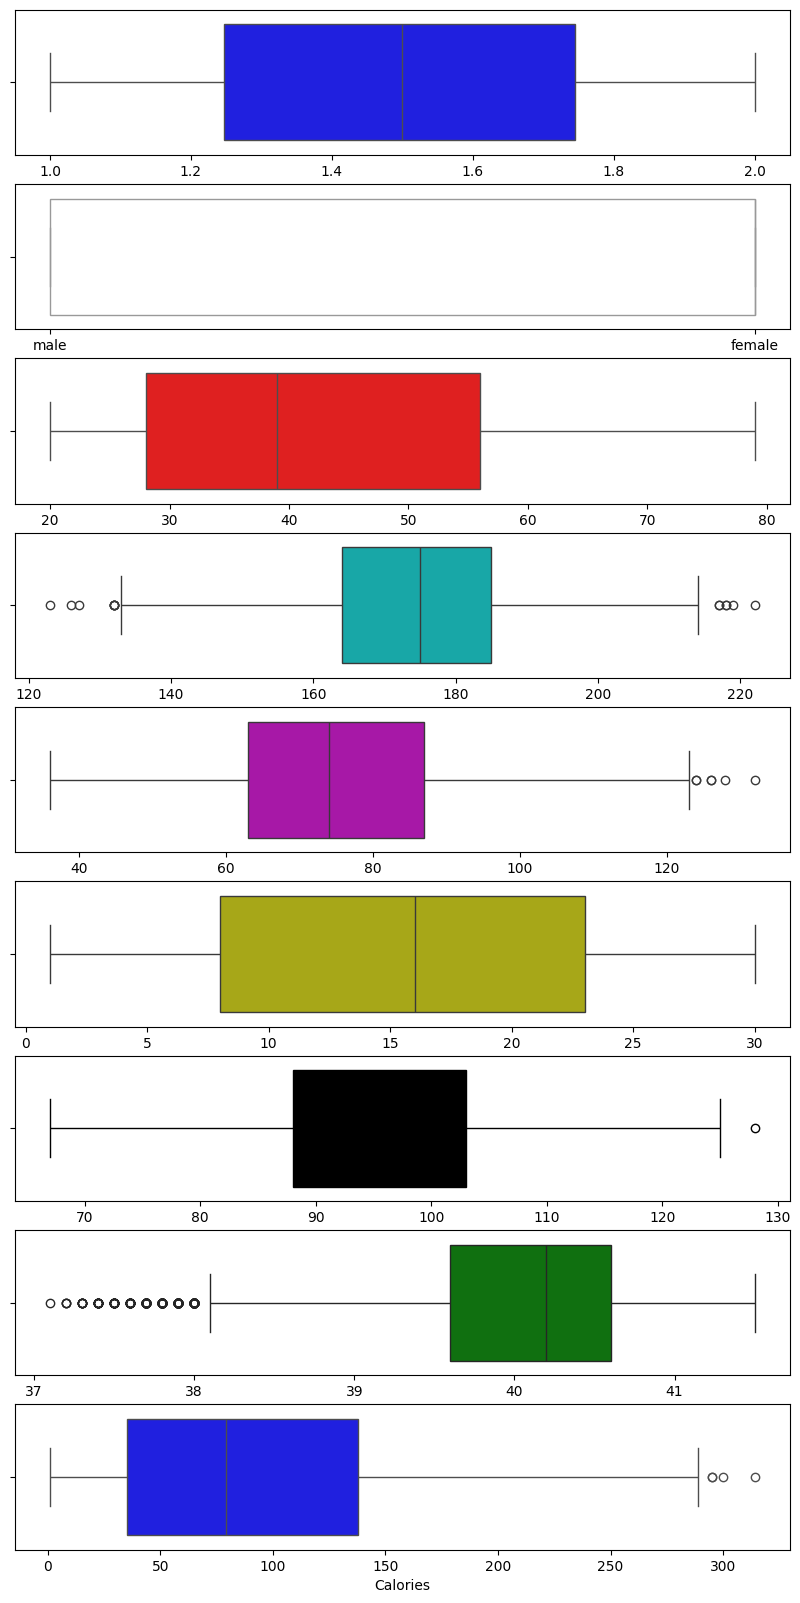

In [ ]:
c = ['b','w','r','c','m','y','k','g','b']
fig1, axes = plt.subplots(len(df.columns), 1, figsize=(10, 20))
axes = axes.flatten()
for i, column in zip(range(len(df.columns)), df.columns):
  try:
    sns.boxplot(data=df, x=column, ax=axes[i], color=c[i])
  except:
    fig1.delaxes(axes[i])
    continue
plt.show()



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
df.drop(columns='User_ID', inplace=True)

df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# prompt: i want to save the file df as fitness.csv

df.to_csv('fitness.csv', index=False)


In [ ]:
df_train, df_test= train_test_split(df, test_size=0.2, random_state=42)
print("df_train data shape :", df_train.shape)
print("df_test data shape :", df_test.shape)

df_train data shape : (12000, 8)
df_test data shape : (3000, 8)


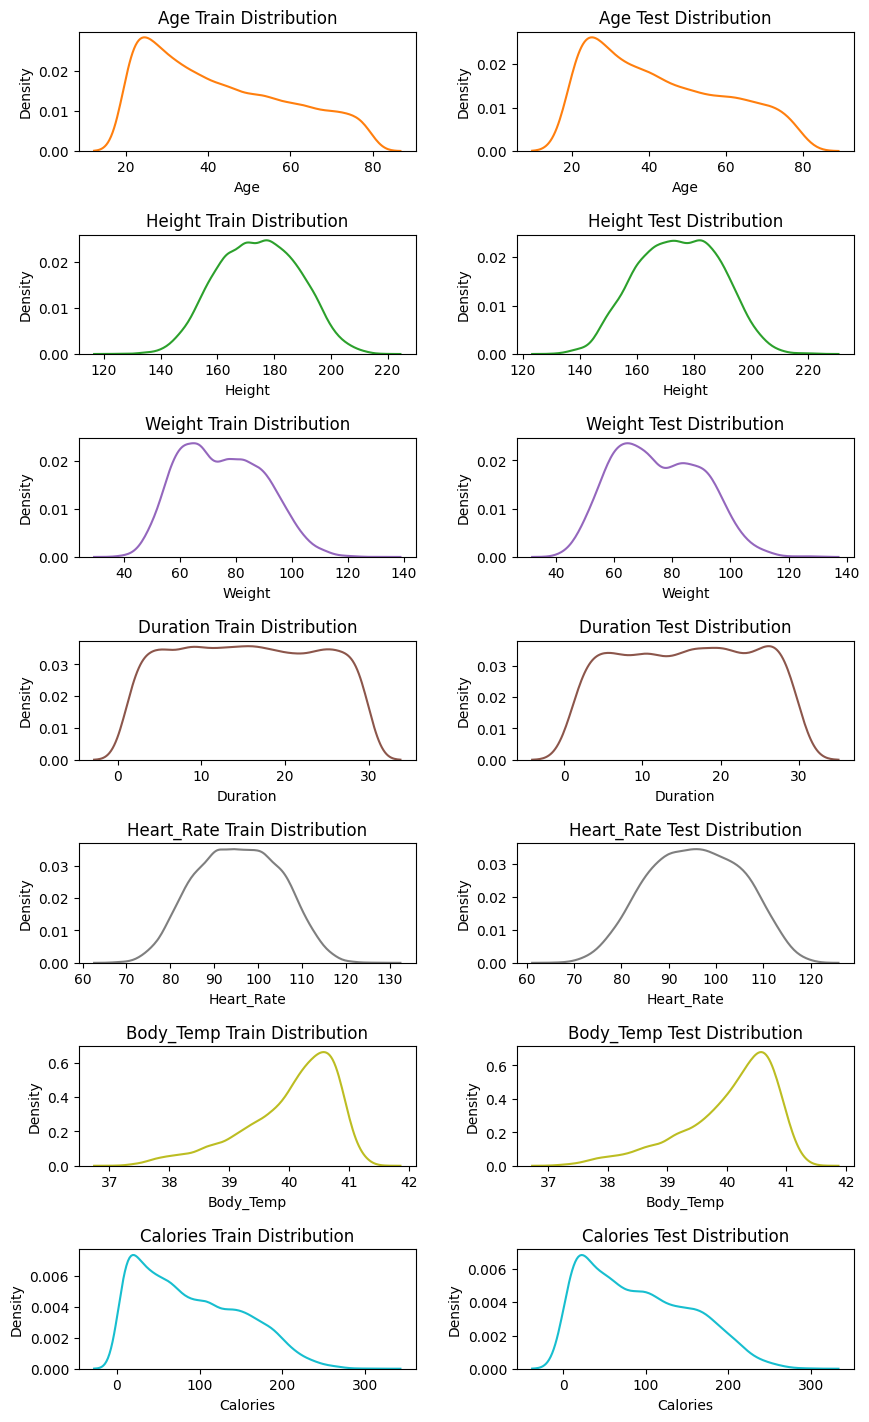

In [ ]:
# Generate color list dynamically
c = plt.cm.get_cmap("tab10", len(df_train.columns)).colors

fig1, axes = plt.subplots(len(df_train.columns), 2, figsize=(10, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
axes = axes.flatten()

# KDE plots for train data
for i, (column, color) in enumerate(zip(df_train.columns, c)):
    try:
        axes[i * 2].set_title(f"{column} Train Distribution")
        sns.kdeplot(data=df_train, x=column, ax=axes[i * 2], color=color)
    except:
        fig1.delaxes(axes[i * 2])
        continue

# KDE plots for test data
for i, (column, color) in enumerate(zip(df_test.columns, c)):
    try:
        axes[i * 2 + 1].set_title(f"{column} Test Distribution")
        sns.kdeplot(data=df_test, x=column, ax=axes[i * 2 + 1], color=color)
    except:
        fig1.delaxes(axes[i * 2 + 1])
        continue

plt.show()


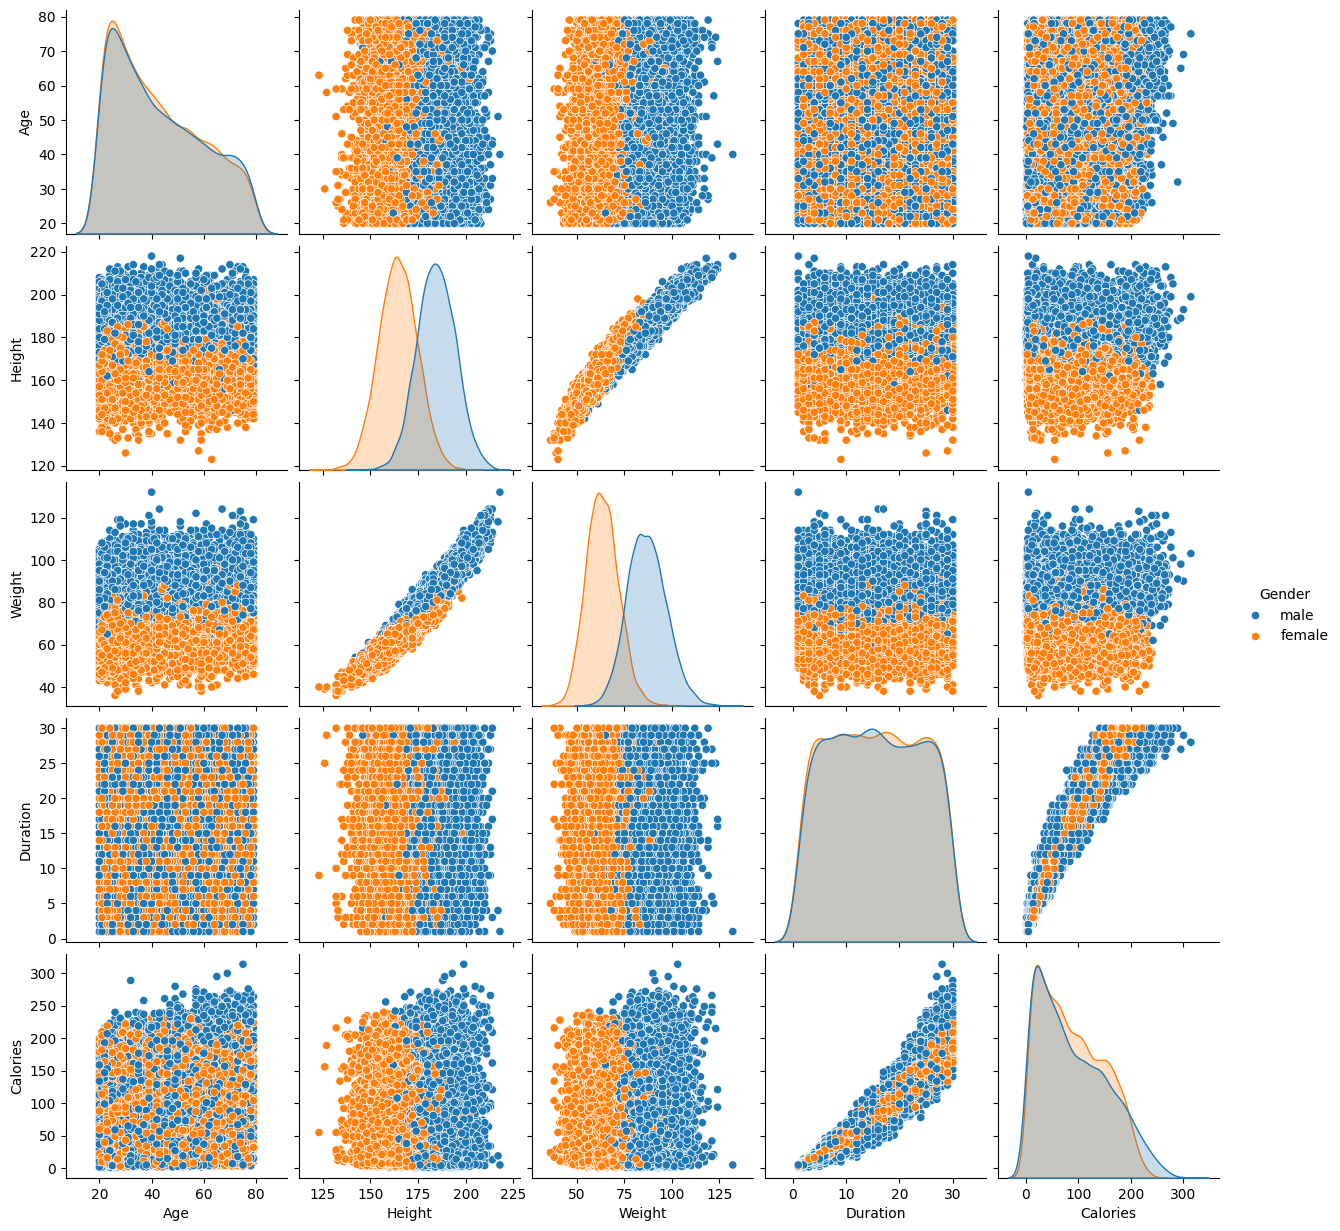

In [ ]:
sns.pairplot(df_train[['Age','Height','Weight','Duration','Calories','Gender']],hue='Gender')

In [ ]:
print("minimum age :",df_train['Age'].min())
print("maximum age :",df_train['Age'].max())

minimum age : 20
maximum age : 79


In [ ]:
age_group= ['young','middle-age','old']
df_train['age_group']= pd.cut(df_train['Age'],bins=[20,40,60,80],labels=age_group)
df_train.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_group
9839,male,37,179.0,77.0,7.0,81.0,39.5,17.0,young
9680,male,23,195.0,87.0,26.0,110.0,40.5,167.0,young
7093,male,33,181.0,77.0,12.0,88.0,40.1,40.0,young
11293,female,66,156.0,54.0,9.0,77.0,39.5,34.0,old
820,female,32,144.0,49.0,5.0,90.0,39.0,23.0,young


In [ ]:
df_train['age_group'].value_counts()

,count
age_group,
young,5830
middle-age,3452
old,2315


<Axes: xlabel='age_group', ylabel='count'>

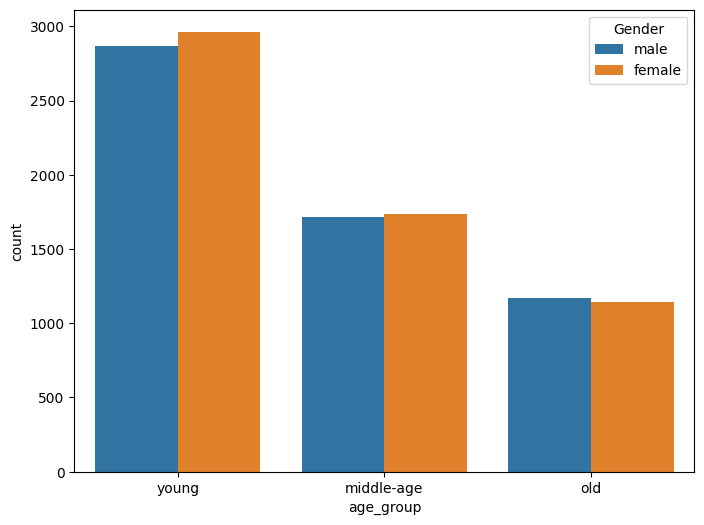

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.countplot(data=df_train, x='age_group', hue='Gender')

In [ ]:
fig = px.box(df_train, x="age_group", y="Calories", color="Gender")

fig.update_layout(
    title="Calories Distribution by Age Group and Gender",
    xaxis_title="Age Group",
    yaxis_title="Calories",
    legend_title="Gender",
    width = 750,
    height = 500
)

fig.show()

In [ ]:
print("dataset's median of duration in min",df_train['Duration'].median())
print("dataset's mean of duration in min",df_train['Duration'].mean())
print("dataset's mode of duration in min",df_train['Duration'].mode())

dataset's median of duration in min 15.0
dataset's mean of duration in min 15.483916666666667
dataset's mode of duration in min 0    8.0
Name: Duration, dtype: float64


In [ ]:
fig = px.box(df_train, x="Gender", y="Duration")
fig.update_layout(
    title="Duration Distribution by Gender",
    xaxis_title="Gender",
    yaxis_title="Duration (min)",
    width = 750,
    height = 500
)
fig.show()

In [ ]:
fig = px.box(df_train, x="Gender", y="Heart_Rate")
fig.update_layout(
    title="Heart Rate Distribution by Gender",
    xaxis_title="Gender",
    yaxis_title="Heart Rate",
    width = 750,
    height = 500
)
fig.show()


In [ ]:
for data in [df_train, df_test]:
    data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)
    data[ 'BMI'] = round(data['BMI'], 2)

In [ ]:
bmi_category = ['underweight', 'normal', 'overweight', 'obese']
df_train['bmi_category'] = pd.cut(df_train['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')],labels = bmi_category )

# Change 'Categories_BMI' to 'bmi_category' to refer to the existing column
df_train['bmi_category'] = df_train["bmi_category"].astype("object") # Corrected line
df_train.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_group,BMI,bmi_category
9839,male,37,179.0,77.0,7.0,81.0,39.5,17.0,young,24.03,normal
9680,male,23,195.0,87.0,26.0,110.0,40.5,167.0,young,22.88,normal
7093,male,33,181.0,77.0,12.0,88.0,40.1,40.0,young,23.50,normal
11293,female,66,156.0,54.0,9.0,77.0,39.5,34.0,old,22.19,normal
820,female,32,144.0,49.0,5.0,90.0,39.0,23.0,young,23.63,normal


In [ ]:
ds = df_train['bmi_category'].value_counts().reset_index()
ds.columns = ['bmi_category', 'count']
ds

,bmi_category,count
0,normal,7494
1,overweight,4506


<Axes: xlabel='bmi_category', ylabel='count'>

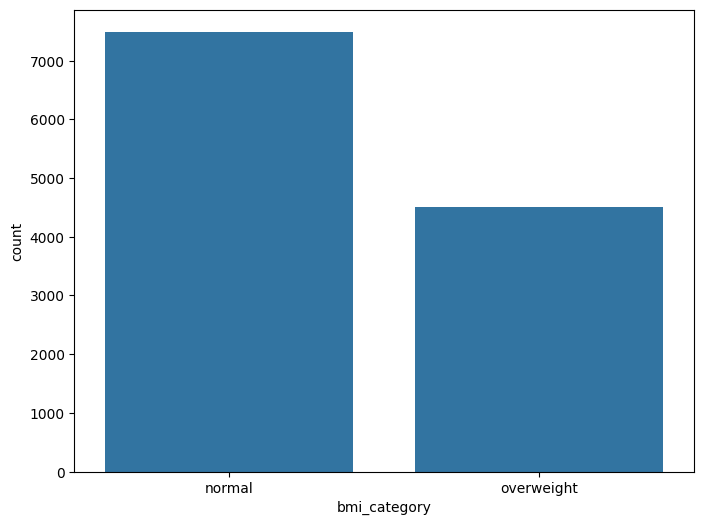

In [ ]:
ds = ds[(ds['bmi_category']=='normal')| (ds['bmi_category']=='overweight')]
plt.rcParams["figure.figsize"] = (8, 6) # Corrected line: Changed 'reParams' to 'rcParams'
sns.barplot(data=ds, x='bmi_category', y='count')

In [ ]:
ds = df_train[["Gender","bmi_category"]].value_counts().reset_index().sort_values(by=['Gender','bmi_category'])
ds.columns = ['Gender','bmi_category','count']
ds

,Gender,bmi_category,count
0,female,normal,5456
3,female,overweight,587
2,male,normal,2038
1,male,overweight,3919


<Axes: xlabel='bmi_category', ylabel='count'>

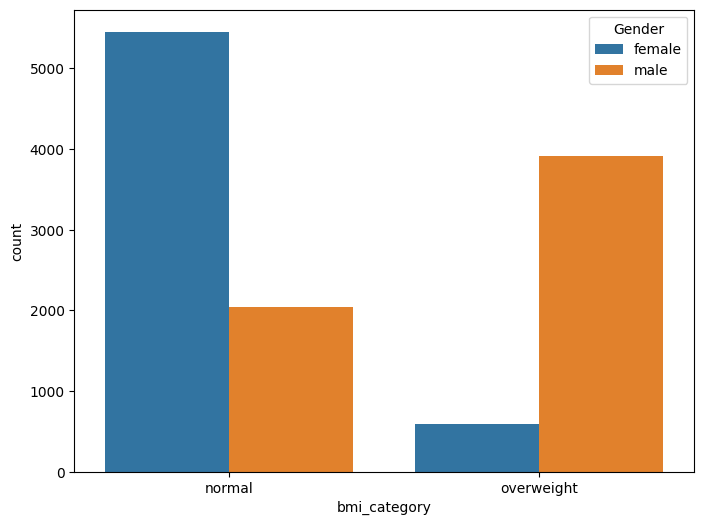

In [ ]:
plt.rcParams["figure.figsize"                                                                                                                        ] = (8, 6)
sns.barplot(data=ds, x='bmi_category', y='count', hue='Gender')

In [ ]:
ds = df_train[["age_group","bmi_category"]].value_counts().reset_index().sort_values(by=['age_group','bmi_category'])
ds.columns = ['age_group','bmi_category','count']
ds


,age_group,bmi_category,count
0,young,normal,4071
2,young,overweight,1759
1,middle-age,normal,2025
3,middle-age,overweight,1427
5,old,normal,1098
4,old,overweight,1217


<Axes: xlabel='bmi_category', ylabel='count'>

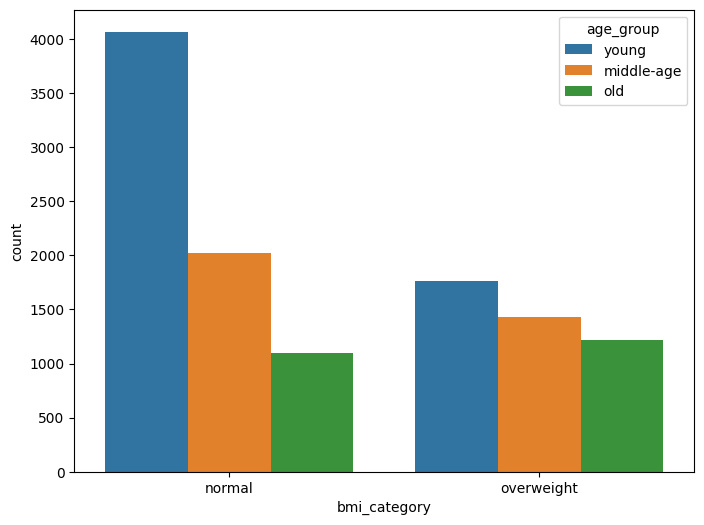

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.barplot(data=ds, x='bmi_category', y='count', hue='age_group')

In [ ]:
fig = px.scatter(df_train, x="Duration", y="Body_Temp", color="Gender")
fig.update_layout(
    title="Body_temp vs Duration by Gender",
    xaxis_title="Duration (min)",
    yaxis_title="Calories",  )

<Axes: >

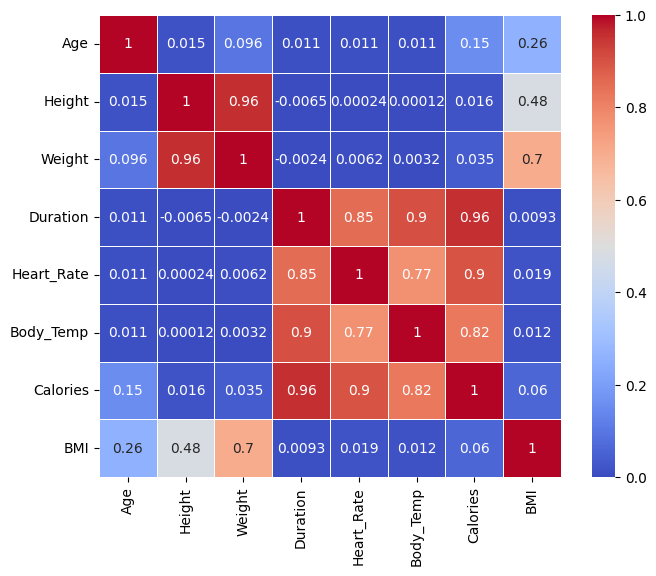

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
# Include only numerical features for correlation analysis
numerical_features = df_train.select_dtypes(include=np.number).columns
corr = df_train[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',square=True,linewidths= .5,vmin=0,vmax = 1)

In [ ]:
# prompt: to show all columns in a dataset

# Assuming df is your DataFrame (as defined in the provided code)
for col in df_train.columns:
  print(col)


Gender
Age
Height
Weight
Duration
Heart_Rate
Body_Temp
Calories
age_group
BMI
bmi_category


In [ ]:
df_train.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_group,BMI,bmi_category
9839,male,37,179.0,77.0,7.0,81.0,39.5,17.0,young,24.03,normal
9680,male,23,195.0,87.0,26.0,110.0,40.5,167.0,young,22.88,normal
7093,male,33,181.0,77.0,12.0,88.0,40.1,40.0,young,23.50,normal
11293,female,66,156.0,54.0,9.0,77.0,39.5,34.0,old,22.19,normal
820,female,32,144.0,49.0,5.0,90.0,39.0,23.0,young,23.63,normal


In [ ]:
df_train = df_train[["Gender","Age","Height","Weight","Duration","Heart_Rate","Body_Temp","Calories"]]
df_train.head()


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
9839,male,37,179.0,77.0,7.0,81.0,39.5,17.0
9680,male,23,195.0,87.0,26.0,110.0,40.5,167.0
7093,male,33,181.0,77.0,12.0,88.0,40.1,40.0
11293,female,66,156.0,54.0,9.0,77.0,39.5,34.0
820,female,32,144.0,49.0,5.0,90.0,39.0,23.0


In [ ]:
df_test = df_test[["Gender","Age","Height","Weight","Duration","Heart_Rate","Body_Temp","Calories"]]
df_test.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
11499,female,45,154.0,52.0,26.0,107.0,40.6,173.0
6475,male,21,187.0,90.0,29.0,111.0,40.5,189.0
13167,male,58,176.0,77.0,11.0,90.0,40.0,53.0
862,male,35,182.0,89.0,24.0,108.0,40.8,161.0
5970,female,67,171.0,67.0,29.0,116.0,41.1,226.0


In [ ]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [ ]:
X_train = df_train.drop('Calories', axis=1)
y_train = df_train['Calories']
X_test = df_test.drop('Calories', axis=1)
y_test = df_test['Calories']

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12000, 7)
y_train shape: (12000,)
X_test shape: (3000, 7)
y_test shape: (3000,)


In [ ]:
X_train.head()


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
9839,37,179.0,77.0,7.0,81.0,39.5,True
9680,23,195.0,87.0,26.0,110.0,40.5,True
7093,33,181.0,77.0,12.0,88.0,40.1,True
11293,66,156.0,54.0,9.0,77.0,39.5,False
820,32,144.0,49.0,5.0,90.0,39.0,False



Logistic Regression Model Results:
Mean Absolute Error (MAE): 19.58
Mean Squared Error (MSE): 1266.89
Root Mean Squared Error (RMSE): 35.59

Decision Tree Model Results:
Mean Absolute Error (MAE): 4.44
Mean Squared Error (MSE): 50.02
Root Mean Squared Error (RMSE): 7.07

Random Forest Model Results:
Mean Absolute Error (MAE): 3.95
Mean Squared Error (MSE): 35.37
Root Mean Squared Error (RMSE): 5.95

SVM Model Results:
Mean Absolute Error (MAE): 3.59
Mean Squared Error (MSE): 26.37
Root Mean Squared Error (RMSE): 5.14


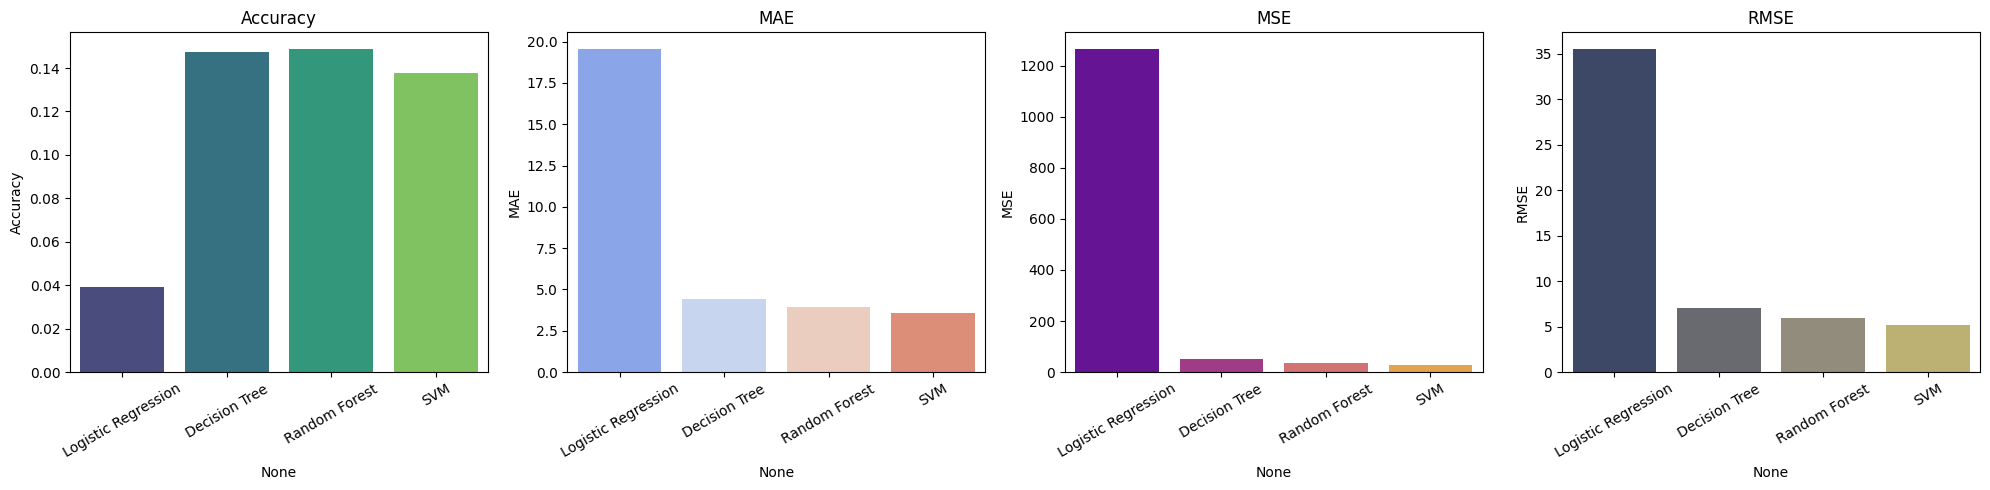

In [ ]:
# Define models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear')
}

# Store results
results = {}

# Train and evaluate models using a loop
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {"Accuracy": accuracy, "MAE": mae, "MSE": mse, "RMSE": rmse}  # Store metrics

    print(f"\n{name} Model Results:")
    # print(f"Accuracy: {accuracy:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    # print(classification_report(y_test, y_pred))

# Convert results dictionary to a DataFrame for visualization
results_df = pd.DataFrame(results).T

# Plot Model Performance
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

metrics = ["Accuracy", "MAE", "MSE", "RMSE"]
colors = ["viridis", "coolwarm", "plasma", "cividis"]

for i, metric in enumerate(metrics):
    sns.barplot(x=results_df.index, y=results_df[metric], palette=colors[i], ax=axes[i])
    axes[i].set_title(metric)
    axes[i].set_xticklabels(results_df.index, rotation=30)

plt.tight_layout()
plt.show()

In [ ]:
# Initialize SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Compute errors
mae = mean_absolute_error(y_test, y_pred_svm)
mse = mean_squared_error(y_test, y_pred_svm)


# Print evaluation results
print("\nSVM Model Performance:")
print("MAE:", mae)
print("MSE:", mse)



SVM Model Performance:
MAE: 3.586333333333333
MSE: 26.373


In [ ]:
df_train.iloc[32]

,4026
Age,27
Height,194.0
Weight,90.0
Duration,7.0
Heart_Rate,89.0
Body_Temp,39.5
Calories,24.0
Gender_male,True


In [ ]:
X_arr = np.array([[25,170,70,30,120,37.00,1]]).reshape(1,-1)
y_pred = svm_model.predict(X_arr)
print("Predicted Calories:", round(y_pred[0], 2))

Predicted Calories: 227.0


In [ ]:
import pickle

# Save the trained model to a file
with open("svm_model.pkl", "wb") as file:
    pickle.dump(svm_model, file)

print("SVM model saved successfully!")


SVM model saved successfully!
